# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [83]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math

df = pd.read_csv('/Users/jacobschroeder/anaconda3/projects/human_temp/data/human_body_temperature.csv')
print(df.head())

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0


### 1. Is the distribution of body temperatures normal?

Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

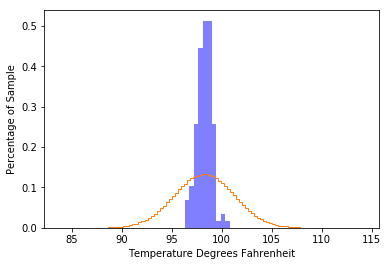

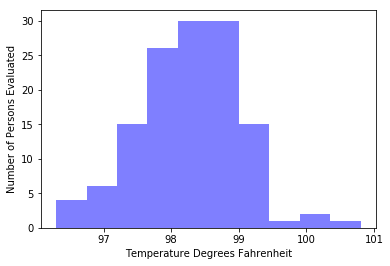

Mean temperature for all subjects: 98.24923076923078


In [84]:
# plot the histogram and a normal distribution, for comparison

# histogram - normed for comparison
plt.hist(df['temperature'], facecolor='blue', alpha=0.5, normed=True)

# normal distribution overlay
samples_std3 = np.random.normal(loc=np.mean(df['temperature']), scale=3, size=1000000)
plt.hist(samples_std3, bins=100, histtype='step', normed=True)
plt.xlabel('Temperature Degrees Fahrenheit')
plt.ylabel('Percentage of Sample')

# show plots
plt.show()

# raw histogram
plt.hist(df['temperature'], facecolor='blue', alpha=0.5)
plt.xlabel('Temperature Degrees Fahrenheit')
plt.ylabel('Number of Persons Evaluated')
plt.show()

# print the mean temperature, for reference
print('Mean temperature for all subjects: {}'.format(np.mean(df['temperature'])))

#### No, the sample is not normally distributed

The distribution is skewed to the left in both graphics. Note the normal distribution overlay in the first graphic.

-------------------------------------------------------------------------------------------

### 2a. Is the sample size large?

Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

In [85]:
# compute the sample size
entries, columns = df.shape
print('The data contains {} entries'.format(entries))

The data contains 130 entries


#### The sample is sufficiently large for CLT (n = 130)

Recall that a normal distribution requires n >= 30.

### 2b. Are the observations independent?

In [86]:
# compute Pearson correlation coefficient between temperature and heart rate
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

print('Pearson correlation coefficient: {}'.format(pearson_r(df['temperature'], df['heart_rate'])))
# hr_lin_reg = draw_bs_pairs(df['temperature'], df['heart_rate'], pearson_r, size=10000)

Pearson correlation coefficient: 0.2536564027207643


#### Observations Are Not Independent
##### Temperature and Heart Rate are positively correlated

This infers that faster heart rates are associated with higher temperatures and vice versa

--------------


### 3. Is the true population mean really 98.6 degrees F?

#### Would you use a one-sample or two-sample test? Why?

I would use a two-sample test to compare the sample data against a second dataset adjusted to the population mean. This way, any variance within the data could be nullified, and the two datasets could be compared against each other. If the sample data and the shifted data carry a low corresponding p-value, then it is likely the real population mean is not 98.6.

#### In this situation, is it appropriate to use the  t  or  z  statistic?

In this example it would be more appropriate to conduct a t-test, since it allows us to determine whether a sample statistic differs significantly from the population statistic.

#### Now try using the other test. How is the result be different? Why?

See comparison of both tests, below:

---------------------------------------------------------


#### One-sample t-test

In [87]:
# add functions for bootstrapping
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap data of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# run one-sample test
hr_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

print('5% Confidence Interval : {}'.format(np.percentile(hr_replicates, [2.5, 97.5])))
print('1% Confidence Interval : {}'.format(np.percentile(hr_replicates, [0.5, 99.5])))
print('P-Value: {}'.format((sum(hr_replicates >= 98.6)/len(hr_replicates))))

5% Confidence Interval : [ 98.11923077  98.37384615]
1% Confidence Interval : [ 98.08153462  98.41385   ]
P-Value: 0.0


The one-sample t-test gives high statistical certainty that the sample mean temperature differs from the population mean temperature. We now check this assumption with a two-sample t-test.

-------------------------

#### Two-sample t-test

In [88]:
# we shift the sample to reflect the population mean of 98.6
hr_shifted = df['temperature'] - np.mean(df['temperature']) + 98.6

# we run bootstrap replicate testing to get our confidence interval and p-value
hr_replicates_two = draw_bs_reps(hr_shifted, np.mean, size=10000)

print('Compare the second sample to the population mean of 98.6')
print('5% Confidence Interval : {}'.format(np.percentile(hr_replicates_two, [2.5, 97.5])))
print('1% Confidence Interval : {}'.format(np.percentile(hr_replicates_two, [0.5, 99.5])))
print('P-Value: {}'.format((sum(hr_replicates_two <= 98.6)/len(hr_replicates_two))))
print('--------------------------')

print('Comparing the two samples:')
print('P-Value: {}'.format((sum(hr_replicates >= hr_replicates_two)/len(hr_replicates_two))))

Compare the second sample to the population mean of 98.6
5% Confidence Interval : [ 98.47461538  98.72307692]
1% Confidence Interval : [ 98.43153846  98.76308077]
P-Value: 0.4995
--------------------------
Comparing the two samples:
P-Value: 0.0


As we expect, the second 'shifted' sample is statistically certain to generate the population mean of 98.6.

In the second part of the output, we reject the null hypothesis that the sample is equal to the population. The p-value is far less than the %1 required for an aggressive confidence interval (99%).

----------


### 4. Draw a small sample of size 10 from the data and repeat both tests.

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t  and  z statistic?

In [89]:
# run one-sample test
hr_sample_10 = np.random.choice(df['temperature'], size=10)
hr_replicates = draw_bs_reps(hr_sample_10, np.mean, size=10000)
print('One Sample:')
print('5% Confidence Interval : {}'.format(np.percentile(hr_replicates, [2.5, 97.5])))
print('1% Confidence Interval : {}'.format(np.percentile(hr_replicates, [0.5, 99.5])))
print('P-Value: {}'.format((sum(hr_replicates >= 98.6)/len(hr_replicates))))

# run two-sample test: second sample
hr_shifted = df['temperature'] - np.mean(df['temperature']) + 98.6
hr_sample_shifted_10 = np.random.choice(hr_shifted, size=10)
hr_replicates_two = draw_bs_reps(hr_sample_shifted_10, np.mean, size=10000)
print('Two Sample:')
print('P-Value: {}'.format((sum(hr_replicates >= hr_replicates_two)/len(hr_replicates_two))))

One Sample:
5% Confidence Interval : [ 98.32  99.14]
1% Confidence Interval : [ 98.21     99.28005]
P-Value: 0.7063
Two Sample:
P-Value: 0.421


In this smaller sampling, we get less accurate measurements of center for both tests. This example suggests that the one-sample approach is more accurate when you have less data.

----------


### 5. At what point should we consider someone's temperature abnormal?

In [90]:
print('1% Confidence Interval : {}'.format(np.percentile(hr_replicates_two, [0.5, 99.5])))

1% Confidence Interval : [ 98.30076923  99.31076923]


Note the %1 confidence interval from the second 'shifted' sample from step three. 

Given the population mean of 98.6 is inherit in this sample, we can use it's confidence interval to make judgements pertaining to temperature abnormalities.

We can say with high confidence (99% interval) that a person's temperature is abnormal if they fall below 98.3 or rise above 99.3.

---------


### 6. Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

In [91]:
# two sample test between males and females
hr_male_sample = df[df['gender'] == 'M']['temperature']
hr_female_sample = df[df['gender'] == 'F']['temperature']

hr_male_replicates = draw_bs_reps(hr_male_sample, np.mean, size=10000)
print('Male Sample:')
print('5% Confidence Interval : {}'.format(np.percentile(hr_male_sample, [2.5, 97.5])))
print('1% Confidence Interval : {}'.format(np.percentile(hr_male_sample, [0.5, 99.5])))
print('Population Mean P-Value: {}'.format((sum(hr_male_sample >= 98.6)/len(hr_male_sample))))

hr_male_replicates = draw_bs_reps(hr_female_sample, np.mean, size=10000)
print('Female Sample:')
print('5% Confidence Interval : {}'.format(np.percentile(hr_female_sample, [2.5, 97.5])))
print('1% Confidence Interval : {}'.format(np.percentile(hr_female_sample, [0.5, 99.5])))
print('Population Mean P-Value: {}'.format((sum(hr_female_sample >= 98.6)/len(hr_female_sample))))
print('------------------------------------')
print('Women Run Warmer Than Men? P-Value: {}'.format((sum(hr_female_sample >= np.mean(hr_male_sample))/len(hr_female_sample))))
print('Men Run Warmer Than Women? P-Value: {}'.format((sum(hr_male_sample >= np.mean(hr_female_sample))/len(hr_male_sample))))

Male Sample:
5% Confidence Interval : [ 96.82  99.34]
1% Confidence Interval : [ 96.428  99.468]
Population Mean P-Value: 0.3076923076923077
Female Sample:
5% Confidence Interval : [ 96.76  99.94]
1% Confidence Interval : [  96.496  100.544]
Population Mean P-Value: 0.4461538461538462
------------------------------------
Women Run Warmer Than Men? P-Value: 0.676923076923077
Men Run Warmer Than Women? P-Value: 0.4


#### Yes, there is significant difference between males and females for normal temperature.

This two-sample test demonstrated that females are statistically more likely to run warmer than males.

---------


### Conclusion

From the tests conducted in this notebook, we can see that temperature has relationships with both gender and heart rate. Females tend to run warmer. Heart rate has a positive Pearson correlation coefficient with temperature.

In addition, we notice that the perceived "normal" temperature of 98.6 is not as stable as we might think. For starters, this statistically significant sample size of 130 people had an average temperature far below the proposed norm. When comparing the sample to a "shifted sample" based on the 98.6 population mean, we find there is almost no overlap whatsoever (p-value less than 0.01) even when resampling occurs many, many times.

#### The Role of Gender

Looking at the sample tests by gender in the last step, it is interesting to note how easily the population mean falls into the confidence intervals. 

Therefore, we can conclude that when factoring gender in the concept of a "normal" temperature, such a population summary statistic becomes significantly more plausible. Simply put, a more stable population mean exists for the genders than it does for humans as a whole, since gender effects mean temperature in such a significant way.